# TASK 2: predicting data_channel

In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter('ignore',DeprecationWarning)
import seaborn as sns
import time

from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import make_blobs

from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn import metrics as mt
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import confusion_matrix as conf
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score

from tabulate import tabulate

In [218]:
data_dir = '../data/'
data_file = 'OnlineNewsPopularity.csv'

file_2_read = data_dir + data_file
df = pd.read_csv(file_2_read)  

In [219]:
df.columns = df.columns.str.strip()
col_names = df.columns.values.tolist()

col_names

['url',
 'timedelta',
 'n_tokens_title',
 'n_tokens_content',
 'n_unique_tokens',
 'n_non_stop_words',
 'n_non_stop_unique_tokens',
 'num_hrefs',
 'num_self_hrefs',
 'num_imgs',
 'num_videos',
 'average_token_length',
 'num_keywords',
 'data_channel_is_lifestyle',
 'data_channel_is_entertainment',
 'data_channel_is_bus',
 'data_channel_is_socmed',
 'data_channel_is_tech',
 'data_channel_is_world',
 'kw_min_min',
 'kw_max_min',
 'kw_avg_min',
 'kw_min_max',
 'kw_max_max',
 'kw_avg_max',
 'kw_min_avg',
 'kw_max_avg',
 'kw_avg_avg',
 'self_reference_min_shares',
 'self_reference_max_shares',
 'self_reference_avg_sharess',
 'weekday_is_monday',
 'weekday_is_tuesday',
 'weekday_is_wednesday',
 'weekday_is_thursday',
 'weekday_is_friday',
 'weekday_is_saturday',
 'weekday_is_sunday',
 'is_weekend',
 'LDA_00',
 'LDA_01',
 'LDA_02',
 'LDA_03',
 'LDA_04',
 'global_subjectivity',
 'global_sentiment_polarity',
 'global_rate_positive_words',
 'global_rate_negative_words',
 'rate_positive_words',
 

In [220]:
del df['n_non_stop_words']
del df['n_non_stop_unique_tokens']
del df['n_unique_tokens']
del df['url']

In [221]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
timedelta,39644.0,354.530471,214.163767,8.00000,164.000000,339.000000,542.000000,731.000000
n_tokens_title,39644.0,10.398749,2.114037,2.00000,9.000000,10.000000,12.000000,23.000000
n_tokens_content,39644.0,546.514731,471.107508,0.00000,246.000000,409.000000,716.000000,8474.000000
num_hrefs,39644.0,10.883690,11.332017,0.00000,4.000000,8.000000,14.000000,304.000000
num_self_hrefs,39644.0,3.293638,3.855141,0.00000,1.000000,3.000000,4.000000,116.000000
num_imgs,39644.0,4.544143,8.309434,0.00000,1.000000,1.000000,4.000000,128.000000
num_videos,39644.0,1.249874,4.107855,0.00000,0.000000,0.000000,1.000000,91.000000
average_token_length,39644.0,4.548239,0.844406,0.00000,4.478404,4.664082,4.854839,8.041534
num_keywords,39644.0,7.223767,1.909130,1.00000,6.000000,7.000000,9.000000,10.000000
data_channel_is_lifestyle,39644.0,0.052946,0.223929,0.00000,0.000000,0.000000,0.000000,1.000000


In [222]:
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ... creating data_channel categorical variable
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

df['data_channel'] = 'Others'

condition = df['data_channel_is_lifestyle'] == 1
df.loc[condition, 'data_channel'] = 'Lifestyle'

condition = df['data_channel_is_entertainment'] == 1
df.loc[condition, 'data_channel'] = 'Entertainment'

condition = df['data_channel_is_bus'] == 1
df.loc[condition, 'data_channel'] = 'Business'

condition = df['data_channel_is_socmed'] == 1
df.loc[condition, 'data_channel'] = 'Social Media'

condition = df['data_channel_is_tech'] == 1
df.loc[condition, 'data_channel'] = 'Technology'

condition = df['data_channel_is_world'] == 1
df.loc[condition, 'data_channel'] = 'World'

del df['data_channel_is_lifestyle']
del df['data_channel_is_entertainment']
del df['data_channel_is_bus']
del df['data_channel_is_socmed']
del df['data_channel_is_tech']
del df['data_channel_is_world']


In [223]:
df.data_channel.value_counts()

World            8427
Technology       7346
Entertainment    7057
Business         6258
Others           6134
Social Media     2323
Lifestyle        2099
Name: data_channel, dtype: int64

In [224]:
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ... integer value of categorical values for multinomial NB classification
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

df['data_channel_n'] = 0

condition = df['data_channel'] == 'Business'
df.loc[condition, 'data_channel_n'] = 1

condition = df['data_channel'] == 'Entertainment'
df.loc[condition, 'data_channel_n'] = 2

condition = df['data_channel'] == 'Lifestyle'
df.loc[condition, 'data_channel_n'] = 3

condition = df['data_channel'] == 'Others'
df.loc[condition, 'data_channel_n'] = 4

condition = df['data_channel'] == 'Social Media'
df.loc[condition, 'data_channel_n'] = 5

condition = df['data_channel'] == 'Technology'
df.loc[condition, 'data_channel_n'] = 6

condition = df['data_channel'] == 'World'
df.loc[condition, 'data_channel_n'] = 7



In [225]:
df.data_channel_n.value_counts()

7    8427
6    7346
2    7057
1    6258
4    6134
5    2323
3    2099
Name: data_channel_n, dtype: int64

In [226]:
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ...  shares is task 1 dependent variable
# ...  we are excluding it from this model as per business model this value is not available
# ...  during data_channel prediction
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

del df['shares'] 


In [227]:
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ...  convert the data type to Integer
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

to_int = ['timedelta','n_tokens_title', 'n_tokens_content',
    'num_hrefs','num_self_hrefs', 'num_imgs', 'num_videos', 'num_keywords',
    'weekday_is_monday',
    'weekday_is_tuesday',
    'weekday_is_wednesday',
    'weekday_is_thursday',
    'weekday_is_friday',
    'weekday_is_saturday',
    'weekday_is_sunday',
    'is_weekend',
    'data_channel_n']
    

df[to_int] = df[to_int ].astype(np.int64)

In [228]:
df[df.duplicated()]

,timedelta,n_tokens_title,n_tokens_content,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,kw_min_min,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,data_channel,data_channel_n


In [229]:
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ...  for all columns with negative values, add +1 to all values in the column
# ...  - the only columns with negative values are polarity / sentiment measures
# ...  - adding a constant to all values does not modify distributions
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

df_numeric = df.select_dtypes(['number'])
numeric_col_names = df_numeric.columns.values.tolist()

# ... store min value for each column

df_mins = df.min()

# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ...  loop on each column, test for min < 0, add constant as applicable
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

for column in numeric_col_names :
    if df_mins[column] < 0 :
        df[column] = df[column] - df_mins[column]
        print('--> min_value < 0 adjusted : ', column, df_mins[column])
        
        
df.describe().T


--> min_value < 0 adjusted :  kw_min_min -1.0
--> min_value < 0 adjusted :  kw_avg_min -1.0
--> min_value < 0 adjusted :  kw_min_avg -1.0
--> min_value < 0 adjusted :  global_sentiment_polarity -0.39375
--> min_value < 0 adjusted :  avg_negative_polarity -1.0
--> min_value < 0 adjusted :  min_negative_polarity -1.0
--> min_value < 0 adjusted :  max_negative_polarity -1.0
--> min_value < 0 adjusted :  title_sentiment_polarity -1.0


,count,mean,std,min,25%,50%,75%,max
timedelta,39644.0,354.530471,214.163767,8.0,164.000000,339.000000,542.000000,731.000000
n_tokens_title,39644.0,10.398749,2.114037,2.0,9.000000,10.000000,12.000000,23.000000
n_tokens_content,39644.0,546.514731,471.107508,0.0,246.000000,409.000000,716.000000,8474.000000
num_hrefs,39644.0,10.883690,11.332017,0.0,4.000000,8.000000,14.000000,304.000000
num_self_hrefs,39644.0,3.293638,3.855141,0.0,1.000000,3.000000,4.000000,116.000000
num_imgs,39644.0,4.544143,8.309434,0.0,1.000000,1.000000,4.000000,128.000000
num_videos,39644.0,1.249874,4.107855,0.0,0.000000,0.000000,1.000000,91.000000
average_token_length,39644.0,4.548239,0.844406,0.0,4.478404,4.664082,4.854839,8.041534
num_keywords,39644.0,7.223767,1.909130,1.0,6.000000,7.000000,9.000000,10.000000
kw_min_min,39644.0,27.106801,69.633215,0.0,0.000000,0.000000,5.000000,378.000000


In [230]:
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ...  ln() transform right skewed distribution variables (skewness > 1)
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

df_numeric = df.select_dtypes(['number'])

numeric_col_names = df_numeric.columns.values.tolist()

# ... store min value for each column

df_mins = df.min()

# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ...  loop on each column, test for skewness, create new column if conditions met
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

columns_to_drop = []

for column in numeric_col_names:
    sk = df[column].skew()
    
    if(sk > 1):
        new_col_name = 'ln_' + column
        print (column, sk, new_col_name)
        
        if df_mins[column] > 0:
            df[new_col_name] = np.log(df[column])
            columns_to_drop.append(column)
            
        elif df_mins[column] == 0:
            df_tmp = df[column] + 1
            df[new_col_name] = np.log(df_tmp)
            columns_to_drop.append(column)
            
        else:
            print('--> Ln() transform not completed -- skew > 1, but min value < 0 :', column, '!!')
            
            
# ... delete tmp data

del df_tmp
del df_mins
del df_numeric

# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ...  based on inspection, a few of these are just not valid ranges in ln() space
# ...  -- just delete these few back out of the data set
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

print (columns_to_drop)

del df['ln_LDA_00']
del df['ln_LDA_01']
del df['ln_LDA_02']
del df['ln_LDA_03']
del df['ln_LDA_04']
columns_to_drop.remove('LDA_00')
columns_to_drop.remove('LDA_01')
columns_to_drop.remove('LDA_02')
columns_to_drop.remove('LDA_03')
columns_to_drop.remove('LDA_04')

# ...  these are binary indicators ... so no need to ln-transform

del df['ln_weekday_is_monday']
del df['ln_weekday_is_tuesday']
del df['ln_weekday_is_wednesday']
del df['ln_weekday_is_thursday']
del df['ln_weekday_is_friday']
del df['ln_weekday_is_saturday']
del df['ln_weekday_is_sunday']
del df['ln_is_weekend']
columns_to_drop.remove('is_weekend')
columns_to_drop.remove('weekday_is_monday')
columns_to_drop.remove('weekday_is_tuesday')
columns_to_drop.remove('weekday_is_wednesday')
columns_to_drop.remove('weekday_is_thursday')
columns_to_drop.remove('weekday_is_friday')
columns_to_drop.remove('weekday_is_saturday')
columns_to_drop.remove('weekday_is_sunday')

#columns_to_drop.remove('data_channel')

print ('\n-----------------------------------\n')
print ('Number of current columns in dataset :', len(df.columns))

df.drop(columns_to_drop, axis = 1, inplace = True)

#df.info()


n_tokens_content 2.94542193879 ln_n_tokens_content
num_hrefs 4.0134948282 ln_num_hrefs
num_self_hrefs 5.17275110576 ln_num_self_hrefs
num_imgs 3.94659584465 ln_num_imgs
num_videos 7.0195327863 ln_num_videos
kw_min_min 2.37494728018 ln_kw_min_min
kw_max_min 35.3284337312 ln_kw_max_min
kw_avg_min 31.3061081027 ln_kw_avg_min
kw_min_max 10.3863716348 ln_kw_min_max
kw_max_avg 16.4116695554 ln_kw_max_avg
kw_avg_avg 5.76017729162 ln_kw_avg_avg
self_reference_min_shares 26.2643641603 ln_self_reference_min_shares
self_reference_max_shares 13.8708490494 ln_self_reference_max_shares
self_reference_avg_sharess 17.9140933777 ln_self_reference_avg_sharess
weekday_is_monday 1.77590824423 ln_weekday_is_monday
weekday_is_tuesday 1.61054706191 ln_weekday_is_tuesday
weekday_is_wednesday 1.60097097689 ln_weekday_is_wednesday
weekday_is_thursday 1.6370700483 ln_weekday_is_thursday
weekday_is_friday 2.03030483518 ln_weekday_is_friday
weekday_is_saturday 3.63708575997 ln_weekday_is_saturday
weekday_is_sunday

# #TODO: EDA

In [231]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

df.columns

df.describe().T

df.data_channel.value_counts()

data_dir = '../data/'
data_file = 'mashable_clean_dataset_for_lab_02_task_02.csv'

file_2_write = data_dir + data_file

df.to_csv(file_2_write, index = False)


Index(['timedelta', 'n_tokens_title', 'average_token_length', 'num_keywords',
       'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'weekday_is_monday',
       'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday',
       'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday',
       'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04',
       'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'max_positive_polarity',
       'avg_negative_polarity', 'min_negative_polarity',
       'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity', 'data_channel',
       'data_channel_n', 'ln_n_tokens_content', 'ln_num_hrefs',
       'ln_num_self_hrefs', 'ln_num_imgs', 'ln_num_videos', 'ln_kw_min_min',
       'ln_kw_max_min', 'ln_kw_avg_min', 'ln_kw_min_max', 'ln_kw_max_avg',
       'ln_kw_avg_avg', 'ln_se

,count,mean,std,min,25%,50%,75%,max
timedelta,39644.0,354.530471,214.163767,8.0,164.000000,339.000000,542.000000,731.000000
n_tokens_title,39644.0,10.398749,2.114037,2.0,9.000000,10.000000,12.000000,23.000000
average_token_length,39644.0,4.548239,0.844406,0.0,4.478404,4.664082,4.854839,8.041534
num_keywords,39644.0,7.223767,1.909130,1.0,6.000000,7.000000,9.000000,10.000000
kw_max_max,39644.0,752324.066694,214502.129573,0.0,843300.000000,843300.000000,843300.000000,843300.000000
kw_avg_max,39644.0,259281.938083,135102.247285,0.0,172846.875000,244572.222223,330980.000000,843300.000000
kw_min_avg,39644.0,1118.146610,1137.456951,0.0,1.000000,1024.635611,2057.781032,3614.039820
weekday_is_monday,39644.0,0.168020,0.373889,0.0,0.000000,0.000000,0.000000,1.000000
weekday_is_tuesday,39644.0,0.186409,0.389441,0.0,0.000000,0.000000,0.000000,1.000000
weekday_is_wednesday,39644.0,0.187544,0.390353,0.0,0.000000,0.000000,0.000000,1.000000


World            8427
Technology       7346
Entertainment    7057
Business         6258
Others           6134
Social Media     2323
Lifestyle        2099
Name: data_channel, dtype: int64

### Training and test split

In [232]:
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ...  copy data frame to classification working data frame
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# ... data set with text categorical target values 

df_data_channel = df.copy()
del df_data_channel['data_channel_n']

# ... data set with integer categorical target values 

df_data_channel_n = df.copy()
del df_data_channel_n['data_channel']
del df_data_channel_n['kw_max_max']
del df_data_channel_n['kw_avg_max']

# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ...  separate X and y matrices 
# ...
# ...  convert to numpy matrices by calling 'values' on the pandas data frames
# ...  they are now simple matrices for compatibility with scikit-learn
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

if 'data_channel' in df_data_channel:
    y = df_data_channel['data_channel'].values         # set 'data_channel' as dependent
    del df_data_channel['data_channel']                # remove from dataset
    X = df_data_channel.values                         # use everything else for independent EVs

if 'data_channel_n' in df_data_channel_n:
    y_n = df_data_channel_n['data_channel_n'].values    # set 'data_channel' as dependent
    del df_data_channel_n['data_channel_n']             # remove from dataset
    X_n = df_data_channel_n.values                      # use everything else for independent EVs


# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ...  dataframe in which to record results of model metrics
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

results_table_labels = ['n_features', 'n_estimate', 'process_time', 'accuracy', 'recall', 'precision', 'f1_score']
df_results = pd.DataFrame(columns = results_table_labels)


# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ...  setup cross-validation in sklearn
# ...
# ...  split into training and test sets
# ....  --> 10 folds
# ...   --> 80% / 20% training / test
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

num_cv_iterations = 10

num_instances = len(y)

cv_object = ShuffleSplit(n_splits = num_cv_iterations,
                         test_size  = 0.2)
                         
print(cv_object)


ShuffleSplit(n_splits=10, random_state=None, test_size=0.2, train_size=None)


In [233]:

# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ...  run through the cross validation loop and set the training and testing
# ...  variable for one single iteration
# ...
# ...  --> this method is memory-user, but easier to follow what is being done 
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

for train_indices, test_indices in cv_object.split(X, y): 
    X_train = X[train_indices]
    y_train = y[train_indices]    
    X_test  = X[test_indices]
    y_test  = y[test_indices]
    
    
for train_indices, test_indices in cv_object.split(X_n, y_n): 
    X_train_n = X_n[train_indices]
    y_train_n = y_n[train_indices]    
    X_test_n  = X_n[test_indices]
    y_test_n  = y_n[test_indices]

# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# ... scale attributes by the training set
# ... - normalize features based on mean & stdev of each column
# ... - do not use the testing data
# ... - use what was last stored in the variables: X_train, y_train, X_test, y_test
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

scl_obj = StandardScaler()
scl_obj.fit(X_train)                        # scale for each column for (0,1) mean, std
    
X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled  = scl_obj.transform(X_test) 


scl_obj.fit(X_train_n)                        # scale for each column for (0,1) mean, std
    
X_train_n_scaled = scl_obj.transform(X_train_n) # apply to training
X_test_n_scaled  = scl_obj.transform(X_test_n) 

StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [234]:
comparison_tbl = pd.DataFrame(columns = ['Model Name','Accuracy','Processing Time'])
i_index=[]
i_index = 0


# 1 : Multinomial logistic regression

In [235]:
tic = time.clock()

#basic multiclass LR

lr_model1 = LogisticRegression(class_weight='balanced', multi_class='multinomial', solver='lbfgs')

lr_model1.fit(X_train_scaled, y_train)  # train object

y_hat = lr_model1.predict(X_test_scaled) # get test set precitions


accuracy = '{0:.4f}'.format(metrics.accuracy_score(y_test, y_hat))

print("accuracy",accuracy )
print("confusion matrix\n", conf(y_test, y_hat))

toc =  time.clock()
exetime = '{0:.4f}'.format(toc-tic)
print('process time',exetime)
print("\n")

raw_data = {
    'Model Name':'Multinomial logistic regression',
    'Accuracy':accuracy,
    'Processing Time': exetime
}

df = pd.DataFrame(raw_data,columns = ['Model Name','Accuracy','Processing Time'],index=[i_index+1])

comparison_tbl = comparison_tbl.append(df)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=1, penalty='l2',
          random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
          warm_start=False)

accuracy 0.7600
confusion matrix
 [[ 956   14   33   16  138   47   20]
 [  13 1093   25  176   58   16   39]
 [  36    2  211   14   30   94    8]
 [   6  130   35 1021   37    3   12]
 [  55   28   38   31  229   16   33]
 [  34   19  259    5   48 1088   72]
 [  18   35   47   32   75   56 1428]]
process time 7.2125




In [236]:
num_cv_iterations = 10
num_instances = len(y)
cv_object = ShuffleSplit(n_splits = num_cv_iterations,
                         test_size  = 0.2)
cv_accuracy=[]
for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X,y)):
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    scl_obj = StandardScaler()
    scl_obj.fit(X_train)                        # scale for each column for (0,1) mean, std
    
    X_train_scaled = scl_obj.transform(X_train) # apply to training
    X_test_scaled = scl_obj.transform(X_test) 
    
    lr_model1.fit(X_train_scaled, y_train)  # train object
    y_hat = lr_model1.predict(X_test_scaled) # get test set precitions
    print("====Iteration",iter_num," ====")
    accuracy = '{0:.4f}'.format(metrics.accuracy_score(y_test, y_hat))
    print("accuracy", accuracy)
    print("confusion matrix\n", conf(y_test, y_hat))
    cv_accuracy.append(accuracy)
    iter_num+=1

StandardScaler(copy=True, with_mean=True, with_std=True)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=1, penalty='l2',
          random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
          warm_start=False)

====Iteration 0  ====
accuracy 0.7630
confusion matrix
 [[1011   24   45    7  142   37   23]
 [  15 1096   21  153   51   10   33]
 [  22    5  221   22   30   89   13]
 [   1  131   35 1013   27    9   14]
 [  82   34   23   35  267   26   33]
 [  38   16  263    4   58  983   65]
 [  16   56   35   25   62   49 1459]]


StandardScaler(copy=True, with_mean=True, with_std=True)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=1, penalty='l2',
          random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
          warm_start=False)

====Iteration 1  ====
accuracy 0.7628
confusion matrix
 [[ 973   16   50   15  127   47   19]
 [   8 1076   24  184   39   10   30]
 [  24    6  216   19   32   96   18]
 [   6  119   29 1004   33    5   14]
 [  68   31   45   34  242   20   34]
 [  31   18  264    1   51 1051   75]
 [  17   41   43   24   61   53 1486]]


StandardScaler(copy=True, with_mean=True, with_std=True)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=1, penalty='l2',
          random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
          warm_start=False)

====Iteration 2  ====
accuracy 0.7653
confusion matrix
 [[1009   18   49   15  121   49   19]
 [   9 1095   19  167   47   12   28]
 [  24    2  215   18   31  102   14]
 [   6  133   25 1034   27    7   19]
 [  74   30   35   33  233   13   35]
 [  34   20  250    3   46 1047   59]
 [  18   59   48   19   67   57 1435]]


StandardScaler(copy=True, with_mean=True, with_std=True)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=1, penalty='l2',
          random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
          warm_start=False)

====Iteration 3  ====
accuracy 0.7599
confusion matrix
 [[1011   13   44   17  145   48   16]
 [  20 1085   24  177   61   12   30]
 [  29    4  237   22   30   83   10]
 [   7  130   34  987   29    4   12]
 [  61   26   47   29  250   19   36]
 [  36   24  256    3   44 1008   60]
 [  16   51   26   26   74   69 1447]]


StandardScaler(copy=True, with_mean=True, with_std=True)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=1, penalty='l2',
          random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
          warm_start=False)

====Iteration 4  ====
accuracy 0.7613
confusion matrix
 [[1007   18   33   21  120   39   21]
 [  13 1142   29  176   55   13   25]
 [  30    3  250   20   32   91    5]
 [   3  132   29  982   36    6   17]
 [  73   26   36   27  256   18   33]
 [  34   23  273    3   51  988   75]
 [  16   40   53   15   72   58 1411]]


StandardScaler(copy=True, with_mean=True, with_std=True)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=1, penalty='l2',
          random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
          warm_start=False)

====Iteration 5  ====
accuracy 0.7623
confusion matrix
 [[1053   12   42   11  121   59   14]
 [  21 1093   30  175   63    6   30]
 [  27    9  225   19   36   81   11]
 [   5  109   42  998   29    8   17]
 [  63   28   39   28  265   18   34]
 [  45   18  266    3   51 1003   70]
 [  16   52   38   25   69   45 1407]]


StandardScaler(copy=True, with_mean=True, with_std=True)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=1, penalty='l2',
          random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
          warm_start=False)

====Iteration 6  ====
accuracy 0.7626
confusion matrix
 [[ 998   18   31   16  130   50   24]
 [   6 1047   25  187   46   17   30]
 [  24    6  233   12   28   98   12]
 [   8  119   42 1048   28    8   10]
 [  72   27   41   29  234   19   31]
 [  39   21  257    2   51 1018   57]
 [  17   42   35   27   75   65 1469]]


StandardScaler(copy=True, with_mean=True, with_std=True)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=1, penalty='l2',
          random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
          warm_start=False)

====Iteration 7  ====
accuracy 0.7693
confusion matrix
 [[ 977   12   40   10  115   52   18]
 [  11 1119   31  155   51   14   38]
 [  21    8  236   17   46   83   14]
 [   6  123   38 1058   24    6   22]
 [  61   30   55   26  236   19   39]
 [  33   17  240    2   41 1006   75]
 [  12   46   37   22   64   55 1468]]


StandardScaler(copy=True, with_mean=True, with_std=True)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=1, penalty='l2',
          random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
          warm_start=False)

====Iteration 8  ====
accuracy 0.7590
confusion matrix
 [[ 994    8   38   14  165   36   22]
 [   8 1031   24  179   51   12   28]
 [  29    9  229   24   35  102   15]
 [   3  137   42 1037   26    6   15]
 [  64   31   35   26  251   22   34]
 [  41   11  258    2   56 1025   61]
 [  18   34   32   26   70   62 1451]]


StandardScaler(copy=True, with_mean=True, with_std=True)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=1, penalty='l2',
          random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
          warm_start=False)

====Iteration 9  ====
accuracy 0.7668
confusion matrix
 [[ 993   15   48   18  140   52   19]
 [   7 1114   21  180   57   15   31]
 [  25    4  225   23   26   80   11]
 [   8  114   43 1000   33    4   18]
 [  67   36   33   28  251   16   33]
 [  35   13  233    3   42 1076   71]
 [  14   39   41   26   73   54 1421]]


In [238]:
cv_accuracy

['0.7630',
 '0.7628',
 '0.7653',
 '0.7599',
 '0.7613',
 '0.7623',
 '0.7626',
 '0.7693',
 '0.7590',
 '0.7668']

# 2 Decision Tree Classifier

In [239]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report
tic = time.clock()

# train and fit
DTclassifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DTclassifier.fit(X_train, y_train)
y_predDT = DTclassifier.predict(X_test)

#accuracy
acc = accuracy_score(y_test, y_predDT)
print(acc)
toc =  time.clock()
exetime = '{0:.4f}'.format(toc-tic)
print('process time',exetime)

#used later in the code for comparison
raw_data = {
    'Model Name':'Decision Tree Classifier',
    'Accuracy':accuracy,
    'Processing Time': exetime
}

df = pd.DataFrame(raw_data,columns = ['Model Name','Accuracy','Processing Time'],index=[i_index+1])
comparison_tbl = comparison_tbl.append(df)

# Making the Confusion Matrix
cmDT = confusion_matrix(y_test, y_predDT)
print(cmDT)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

0.744734518855
process time 3.9995
[[1015   28   39   22   75   62   44]
 [  31 1100   13  179   42   18   42]
 [  40   14  141   27   20  133   19]
 [  17  152   29  954   24    8   36]
 [  82   39   20   23  220   35   45]
 [  54   34  167   10   34 1087   87]
 [  40   51   27   36   47   79 1388]]


# 3 Random Forest Classifier

In [240]:
from sklearn.ensemble import RandomForestClassifier
tic = time.clock()
# train and test 
RFclf = RandomForestClassifier(criterion = 'entropy', max_depth=50, n_estimators=10, n_jobs=-1)
RFclf.fit(X_train, y_train)
y_predRF = RFclf.predict(X_test)

# accuracy
total_accuracyRF = mt.accuracy_score(y_test, y_predRF)
print ('Accuracy', total_accuracyRF)
toc =  time.clock()
exetime = '{0:.4f}'.format(toc-tic)
print('process time',exetime)

#used later in the code for comparison
raw_data = {
    'Model Name':'Random Forest Classifier',
    'Accuracy':total_accuracyRF,
    'Processing Time': exetime
}

df = pd.DataFrame(raw_data,columns = ['Model Name','Accuracy','Processing Time'],index=[i_index+1])
comparison_tbl = comparison_tbl.append(df)

# Making the Confusion Matrix
cmRF2 = confusion_matrix(y_test, y_predRF)
print(cmRF2)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Accuracy 0.808803127759
process time 6.0634
[[1140   20   11   11   17   52   34]
 [  25 1171    2  163    5   30   29]
 [  54   11  105   29   13  165   17]
 [  15  104   19 1055    3    7   17]
 [ 115   44   10   27  183   37   48]
 [  45   21   65    4    7 1272   59]
 [  39   40   11   30    8   53 1487]]


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


<Container object of 50 artists>

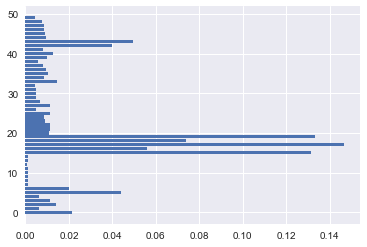

In [241]:
print (RFclf)

plt.barh(range(len(RFclf.feature_importances_)), RFclf.feature_importances_)
plt.show()

In [242]:
comparison_tbl = comparison_tbl.reset_index(drop=True)
comparison_tbl

,Model Name,Accuracy,Processing Time
0,Multinomial logistic regression,0.7600,7.2125
1,Decision Tree Classifier,0.7668,3.9995
2,Random Forest Classifier,0.808803,6.0634


#  3: Naive Bayes ***


In [243]:
from sklearn.naive_bayes import MultinomialNB

clf_mnb = MultinomialNB(alpha = 1.0, class_prior = None, fit_prior = True)

clf_mnb.fit(X_train_n, y_train_n)

print('\n class counts') 
print (clf_mnb.class_count_)
print('\n class prior prob (log)')
print (clf_mnb.class_log_prior_)

print('\n\n\n feature counts') 
print (clf_mnb.feature_count_)
print('\n feature prob (log)')
print (clf_mnb.feature_log_prob_)

y_hatm = clf_mnb.predict(X_test_n)
    
accm = mt.accuracy_score(y_test_n, y_hatm)
    
print('MultinomialNB Naïve Bayes Accuracy :', accm) 

# ... confusion matrix

cm_nb = confusion_matrix(y_test_n, y_hatm)
print(cm_nb)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


 class counts
[ 5037.  5643.  1672.  4849.  1886.  5919.  6709.]

 class prior prob (log)
[-1.83997909 -1.72637392 -2.94276924 -1.87801726 -2.82233157 -1.67862224
 -1.55333985]



 feature counts
[[  1.93435900e+06   5.18080000e+04   2.36253918e+04   3.26750000e+04
    5.61222605e+06   9.23000000e+02   9.26000000e+02   1.02100000e+03
    1.02300000e+03   6.69000000e+02   1.97000000e+02   2.78000000e+02
    4.75000000e+02   3.29156037e+03   3.94207026e+02   4.10121965e+02
    3.31728191e+02   6.09382447e+02   2.19493266e+03   2.66721446e+03
    2.17825545e+02   3.71833793e+03   1.29966207e+03   1.77739333e+03
    3.86465037e+03   3.81427361e+03   2.61185212e+03   4.49132456e+03
    1.27174292e+03   5.44193094e+03   1.71007737e+03   3.03150155e+04
    1.06759609e+04   5.60011914e+03   3.97740528e+03   1.09967265e+03
    6.70959891e+03   3.19701297e+04   2.69426750e+04   2.64485552e+04
    4.22691822e+04   3.98991442e+04   2.87068603e+04   3.21707003e+04
    3.09912314e+04   7.34562464e+

## Grid Search

In [188]:
from sklearn.grid_search import GridSearchCV
params = {'C':[100, 1000], 'tol': [0.001, 0.0001]}
log_reg = LogisticRegression(solver='lbfgs', multi_class='multinomial')
clf = GridSearchCV(log_reg, params, scoring='log_loss', refit='True', n_jobs=-1, cv=5)
clf.fit(X_train, y_train)

print("best params: " + str(clf.best_params_))
for params, mean_score, scores in clf.grid_scores_:
  print("%0.3f (+/-%0.03f) for %r" % (mean_score, scores.std(), params))
  print(scores)

best params: {'C': 100, 'tol': 0.001}
-1.707 (+/-0.005) for {'C': 100, 'tol': 0.001}
[-1.709344   -1.70980855 -1.6985925  -1.70435365 -1.71102994]
-1.707 (+/-0.005) for {'C': 100, 'tol': 0.0001}
[-1.709344   -1.70980855 -1.6985925  -1.70435365 -1.71102994]
-1.707 (+/-0.005) for {'C': 1000, 'tol': 0.001}
[-1.709344   -1.70980853 -1.6985925  -1.70435365 -1.7110587 ]
-1.707 (+/-0.005) for {'C': 1000, 'tol': 0.0001}
[-1.709344   -1.70980853 -1.6985925  -1.70435365 -1.7110587 ]


# TO DO list
EDA for data_channel predition

calculating recall and precision from confusion matrix. generic function for all models. 

cross validation for all models.

Naive Bayes is throwing import error of sklearn



# rubrik
### 1	Data Preparation Part 1	
10	
Define and prepare your class variables. Use proper variable representations (int, float, one-hot, etc.). Use pre-processing methods (as needed) for dimensionality reduction, scaling, etc. Remove variables that are not needed/useful for the analysis.
### 2	Data Preparation Part 2
5	
Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created).
###  Modeling and Evaluation 1	
10	Choose and explain your evaluation metrics that you will use (i.e., accuracy,precision, recall, F-measure, or any metric we have discussed). Why are the measure(s) appropriate for analyzing the results of your modeling? Give a detailed explanation backing up any assertions.
### 	Modeling and Evaluation 2	
10	
Choose the method you will use for dividing your data into training and testing splits (i.e., are you using Stratified 10-fold cross validation? Why?). Explain why your chosen method is appropriate or use more than one method as appropriate. For example, if you are using time series data then you should be using continuous training and testing sets across time.

### 	Modeling and Evaluation 3	
20	
Create three different classification/regression models for each task (e.g., random forest, KNN, and SVM for task one and the same or different algorithms for task two). Two modeling techniques must be new (but the third could be SVM or logistic regression). Adjust parameters as appropriate to increase generalization performance using your chosen metric. You must investigate different parameters of the algorithms!

### 	Modeling and Evaluation 4	
10	
Analyze the results using your chosen method of evaluation. Use visualizations of the results to bolster the analysis. Explain any visuals and analyze why they are interesting to someone that might use this model.

### 	Modeling and Evaluation 5	
10	
Discuss the advantages of each model for each classification task, if any. If there are not advantages, explain why. Is any model better than another? Is the difference significant with 95% confidence? Use proper statistical comparison methods. You must use statistical comparison techniques—be sure they are appropriate for your chosen method of validation as discussed in unit 7 of the course.

### 	Modeling and Evaluation 6	
10	
Which attributes from your analysis are most important? Use proper methods discussed in class to evaluate the importance of different attributes. Discuss the results and hypothesize about why certain attributes are more important than others for a given classification task.

### 	Deployment	
5	
How useful is your model for interested parties (i.e., the companies or organizations that might want to use it for prediction)? How would you measure the model's value if it was used by these parties? How would your deploy your model for interested parties? What other data should be collected? How often would the model need to be updated, etc.? 

### 	Exceptional Work	
10	
You have free reign to provide additional analyses. One idea: grid search parameters in a parallelized fashion and visualize the performances across attributes. Which parameters are most significant for making a good model for each classification algorithm?